<a href="https://colab.research.google.com/github/tewei0328/teach-programming/blob/main/colab_backtesting_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=a5667dd68e89c64d81d3d9578bfe87e747aea04a24bb3a4ed4908c465b08a771
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


2001-08-15 00:00:00+08:00 Buy: Price: 23.90457534790039, Slow: [22.72462496 22.70767499 22.69047556 22.66567307 22.63937571], Fast: [22.23813753 22.33411531 22.42136335 22.53476706 22.64818735]
2001-09-12 00:00:00+08:00 Sell: Price: 21.98501968383789, Slow: [22.47797263 22.47385859 22.47585302 22.47547791 22.47448042], Fast: [22.75286179 22.656884   22.58709602 22.48240509 22.38642731]
2001-11-12 00:00:00+08:00 Buy: Price: 23.72998046875, Slow: [21.81516088 21.80057971 21.79185469 21.7843756  21.78026254], Fast: [20.74109631 21.05168905 21.31341562 21.53150978 21.78450661]
2002-06-21 00:00:00+08:00 Sell: Price: 26.487085342407227, Slow: [27.7048136  27.72662476 27.74817482 27.77670368 27.81230033], Fast: [28.42371426 28.23177614 28.01105433 27.80777569 27.60538635]
2003-05-06 00:00:00+08:00 Buy: Price: 18.349014282226562, Slow: [17.83412918 17.81455204 17.8036119  17.79977265 17.79171145], Fast: [17.59847355 17.67332716 17.73282051 17.77697115 17.81727695]
2004-02-27 00:00:00+08:00 Sel

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


Start                     2000-01-04 00:00...
End                       2024-03-11 00:00...
Duration                   8833 days 00:00:00
Exposure Time [%]                   70.316907
Equity Final [$]              18966077.514275
Equity Peak [$]               18966077.514275
Return [%]                        1796.607751
Buy & Hold Return [%]             2109.817862
Return (Ann.) [%]                   13.092707
Volatility (Ann.) [%]               24.629613
Sharpe Ratio                         0.531584
Sortino Ratio                        0.916184
Calmar Ratio                          0.33496
Max. Drawdown [%]                  -39.087364
Avg. Drawdown [%]                   -5.008378
Max. Drawdown Duration     1278 days 00:00:00
Avg. Drawdown Duration       68 days 00:00:00
# Trades                                   24
Win Rate [%]                        54.166667
Best Trade [%]                       97.69332
Worst Trade [%]                    -14.540076
Avg. Trade [%]                    

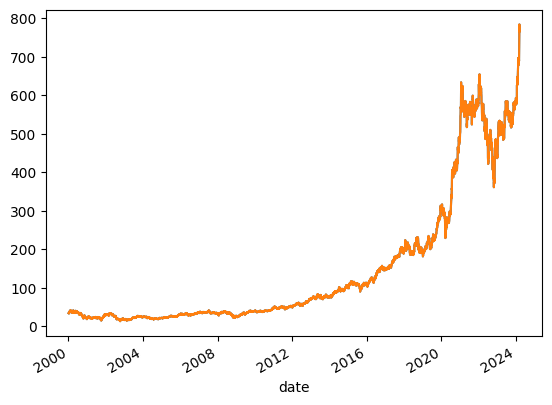

In [ ]:
# %% [markdown]
# ## 1 - (Ver.2) Read csv檔至dataframe

#import pandas as pd
#df=pd.read_csv('.\data-202309\TXF1_day_2023_0909.csv')
#df=pd.read_csv('TXF1_day_2023_0909.csv')
#df.head()

# %%
import yfinance as yf
import pandas as pd

def get_historical_data(ticker):
  d = yf.Ticker(ticker)
  df = d.history(period="max")
  df.columns = df.columns.str.lower()
  df.columns = pd.Series(df.columns).str.capitalize().values
  return df.dropna()

df = get_historical_data('2330.TW')
df=df.reset_index() #要存入資料庫前要取消時間索引
df.head()

#

df.drop(
    #columns=["date", "futures_id","contract_date", "spread", "spread_per","settlement_price","open_interest","trading_session"],
    #columns=["Date", "Time"],
    columns=["Dividends", "Stock splits"],
    inplace=True,
)


df.rename(
    columns={
        "Date": "date",
        "Open": "open",
        "High": "high",
        "Low": "low",
        "Close": "close",
        "Volume": "volume",
    },
    inplace=True,
)

df.head()

#
df.index = pd.to_datetime(df["date"])
df.drop(
    #columns=["date", "futures_id","contract_date", "spread", "spread_per","settlement_price","open_interest","trading_session"],
    columns=["date"],
    inplace=True,
)
df.head()

#
# ## 2- Pandas畫圖

start_date = '2000-01-01' #注意:該日期得存在, 才能正常執行
end_date = '2023-09-08'
date_range = 'date >= "2000-01-01" and date <= "2023-09-08"'

#df.index = pd.to_datetime(df["date"])
#df.index = pd.to_datetime(df["date"], format='ISO8601') #有些不一致的日期格式得用format參數

#df.head()
df.close.plot()
# %%
result=df
#result=df[start_date:end_date]
#result = df.query(date_range)
result.close.plot()

# %%
#result1=df[df.date.between(start_date, end_date)]
#result1.close.plot()


# %% [markdown]
# # Backtesting

# %%
#%pip install backtesting

# %%

# ! pip install backtesting #在Colab中要先執行這一行
import datetime
import warnings

import pandas as pd
import requests
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
#from pandas.core.common import SettingWithCopyWarning

#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_columns", None)

# %%
result

# %%
class SmaCross1_long_short(Strategy):

    n1=1
    n2=25

    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, self.n1)
        self.slow_line = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.position.close()
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.position.close()
            self.sell()

# %%
class SmaCross2_long(Strategy):
# 只多不空

    n1=20
    n2=200

    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, self.n1)
        self.slow_line = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            #self.buy()
            # If ema1 crosses above ema2, buy the asset
            #self.position.close()
            self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            self.position.close()
            #self.sell()


class SmaCross3_short(Strategy):
# 只多不空

    n1=20
    n2=200

    def init(self):
        self.fast_line = self.I(SMA, self.data.Close, self.n1)
        self.slow_line = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.fast_line, self.slow_line):
            print(
                f"{self.data.index[-1]} Buy: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            #self.buy()
            # If ema1 crosses above ema2, buy the asset
            self.position.close()
            #self.buy()
        elif crossover(self.slow_line, self.fast_line):
            print(
                f"{self.data.index[-1]} Sell: Price: {self.data.Close[-1]}, Slow: {self.slow_line[-5:]}, Fast: {self.fast_line[-5:]}"
            )
            #self.position.close()
            self.sell()
# %% [markdown]
# ## 執行策略
# cash：本金。
# commission：交易費用。
# exclusive_orders：是否禁止多頭操作(同時只能買空或賣空)。
# trade_on_close：於收盤時交易，否則預設於開盤交易。
# exclusive_orders：若為True時，每次操作前自動關閉(close)上次操作。 Buy(500)、Buy(1000) -> 最後持股1000 Buy(500)、Sell(500) -> 賣空500 . 如果trade_on_close是True，市價訂單將根據當前柱的收盤價而不是下一個柱的開盤價執行。
#
# 如果hedging是True，則允許同時雙向交易。如果False，則反向訂單首先以FIFO方式關閉現有交易。
#
# 如果exclusive_orders是True，每個新訂單都會自動關閉之前的交易/頭寸，每次最多進行一次有效的交易（多頭或空頭）。

# %%
result.rename(
    columns={
        "date": "Date",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
        "volume": "Volume",
    },
    inplace=True,
)

# %%
bt = Backtest(
    result,
    #SmaCross1_long_short,
    SmaCross2_long,
    #SmaCross3_short,
    cash=1000000,
    commission=0.000,
    exclusive_orders=True,
    trade_on_close=True,
)
output = bt.run()
equity = output['_equity_curve']
trades = output['_trades']


# %%
#%pip install bokeh==2.4.3 #於Colab要先執行這一行
bt.plot()


# %%
print(output)
print(equity)
print(trades)

# %%
#import backtesting
#backtesting.set_bokeh_output(notebook=True)



#result2 = bt.optimize(n1=range(5, 100, 5),
#                      n2=range(5, 100, 5))

#bt.plot()